In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA

Q5

In [37]:
xy_excel_path = '/Users/markoshea/Desktop/Working Directories/Datasets/xyseries.xls'

xy_excel_data = pd.ExcelFile(xy_excel_path)
for sheet_name in xy_excel_data.sheet_names:
    xy_df = pd.read_excel(xy_excel_path, sheet_name=sheet_name)
    print(f"Sheet Name: {sheet_name}")
    print(xy_df.head())
    xy_df.to_csv(f"{sheet_name}.csv", index=False)

Sheet Name: Sheet1
           X         Y
0  11.034430  0.239293
1  11.107354  0.962884
2   9.914969 -2.124441
3   9.911697 -1.972051
4  10.887862 -1.759939


In [38]:
print(xy_df)

             X         Y
0    11.034430  0.239293
1    11.107354  0.962884
2     9.914969 -2.124441
3     9.911697 -1.972051
4    10.887862 -1.759939
..         ...       ...
495  11.581292  1.069054
496  12.734498 -1.463218
497  11.569178  3.013655
498  11.923236  0.013895
499  13.186613  0.384117

[500 rows x 2 columns]


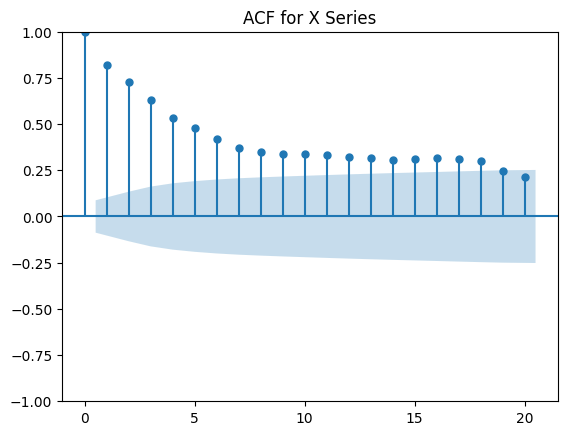

In [39]:
#plot ACF for x series
x_series = xy_df['X']

plot_acf(x_series, lags=20, alpha=0.05)
plt.title("ACF for X Series")
plt.show()

Text(0.5, 1.0, 'PACF for X Series')

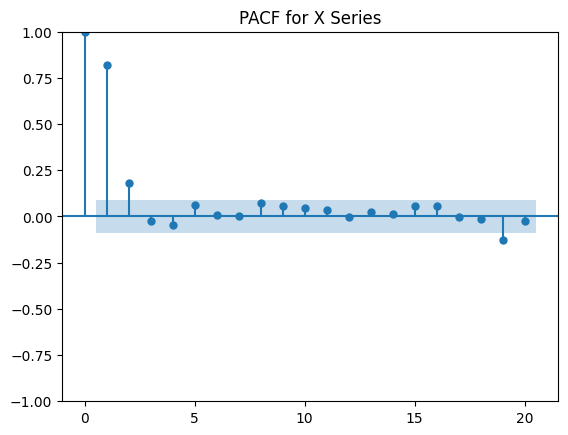

In [40]:
#PACF for x series
plot_pacf(x_series, lags=20, alpha=0.05)
plt.title("PACF for X Series")

We observe that the ACF decays gradually over 20 lags, and seems to reach its minimum by around 8 lags. The PACF, in contrast, decays almost completely by lag 3 (but really lag 2 since y_t is always correlated with itself, and that is the first term here). Since the autocorrelations are zero for terms that are more that p lags away in an AR(p) model, we deduce our model is autoregressive with 2 lags: AR(2).

In [41]:
#estimate AR(2) for x series
x_model = ARIMA(x_series, order=(2, 0, 0))
x_result = x_model.fit()
print(x_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      X   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -704.493
Date:                Sat, 25 Jan 2025   AIC                           1416.986
Time:                        00:35:09   BIC                           1433.845
Sample:                             0   HQIC                          1423.602
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3986      0.304     34.186      0.000       9.802      10.995
ar.L1          0.6714      0.048     14.047      0.000       0.578       0.765
ar.L2          0.1819      0.048      3.823      0.0

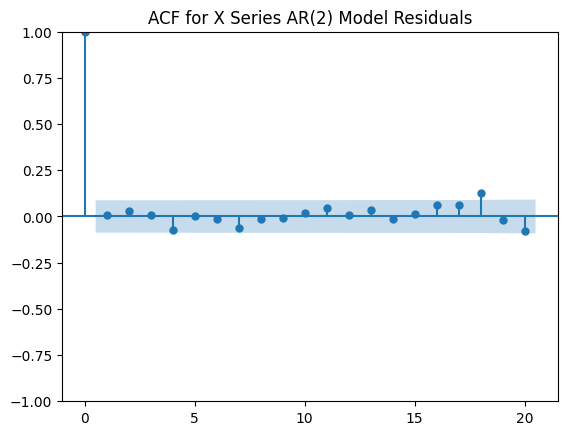

In [42]:
#plot ACF for x series model residuals
x_residuals = x_result.resid

plot_acf(x_residuals, lags=20, alpha=0.05)
plt.title("ACF for X Series AR(2) Model Residuals")
plt.show()

The ACF for the the AR(2) model residuals has nearly all lags within a 95% interval, indicating the residuals are likely white noise. This supports our assertion that the X series can be described by an AR(2) process. The spike at lag 0 is a notable exception because a series is always perfectly correlated with itself.

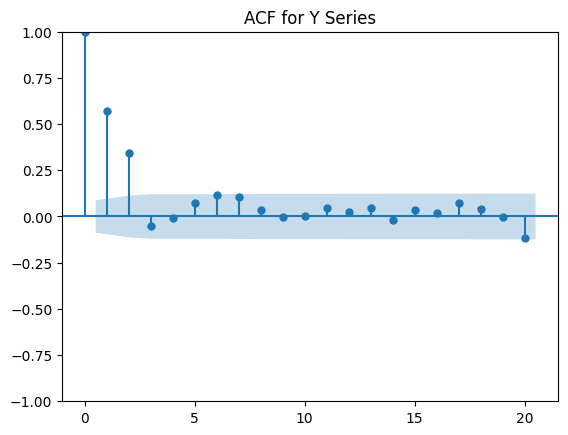

In [43]:
y_series = xy_df['Y']

plot_acf(y_series, lags=20, alpha=0.05)
plt.title("ACF for Y Series")
plt.show()

Text(0.5, 1.0, 'PACF for Y Series')

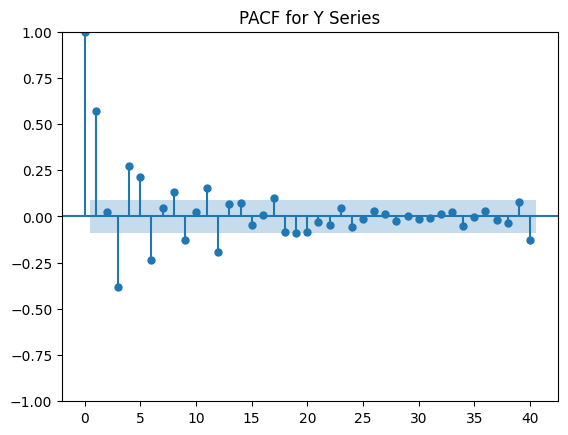

In [44]:
#PACF for y series
plot_pacf(y_series, lags=40, alpha=0.05)
plt.title("PACF for Y Series")

Here we observe that the ACF decays to noise after the 2nd lag. This suggests an MA(2) model. However, the PACF has high variation and does not appear to decay until around lag 17. Thus, it is not clearly a pure MA or AR model, so we fit a low order ARMA model and examine the residuals.

In [45]:
y_model = ARIMA(y_series, order=(1, 0, 2))
y_result = y_model.fit()
print(y_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  500
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -725.847
Date:                Sat, 25 Jan 2025   AIC                           1461.695
Time:                        00:35:10   BIC                           1482.768
Sample:                             0   HQIC                          1469.964
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0255      0.118      8.701      0.000       0.794       1.256
ar.L1         -0.0834      0.052     -1.613      0.107      -0.185       0.018
ma.L1          0.8342      0.019     44.517      0.0

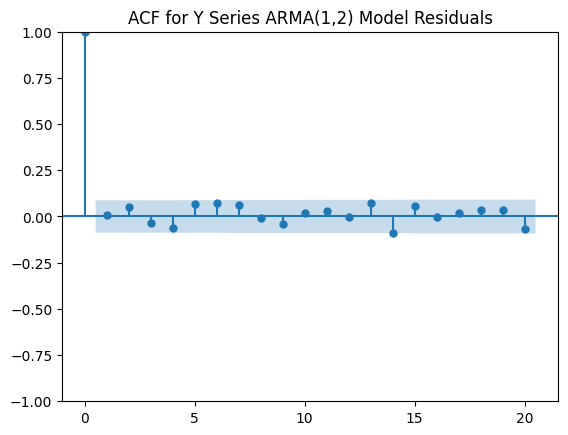

In [46]:
#plot ACF for y series model residuals
y_residuals = y_result.resid

plot_acf(y_residuals, lags=20, alpha=0.05)
plt.title("ACF for Y Series ARMA(1,2) Model Residuals")
plt.show()

After fitting an ARMA(1,2) model to the data, it seems likely that this model approximately models the process. The only minor issue that appeared is that one of the coefficients was statistically insignificant at p=0.107. Otherwise, the ACF indicates that the residuals can be treated as random noise.

Q6

In [47]:
ttm_excel_path = '/Users/markoshea/Desktop/Working Directories/Datasets/ttm.xls'

ttm_excel_data = pd.ExcelFile(ttm_excel_path)
for sheet_name in ttm_excel_data.sheet_names:
    ttm_df = pd.read_excel(ttm_excel_path, sheet_name=sheet_name)
    ttm_df.to_csv(f"{sheet_name}.csv", index=False)

In [48]:
print(ttm_df)

          DATE           TIME_M EX  SYM  SIZE  PRICE
0     20200930  09:35:00.624000  D  TTM   100  9.075
1     20200930  09:35:01.146000  K  TTM   100  9.080
2     20200930  09:35:01.146000  P  TTM   400  9.080
3     20200930  09:35:01.146000  K  TTM   100  9.080
4     20200930  09:35:01.146000  T  TTM   100  9.080
...        ...              ... ..  ...   ...    ...
5853  20200930  15:59:58.097000  N  TTM   192  9.090
5854  20200930  15:59:58.598000  N  TTM   800  9.090
5855  20200930  15:59:58.599000  N  TTM   100  9.100
5856  20200930  15:59:59.977000  Z  TTM    59  9.090
5857  20200930  15:59:59.981000  N  TTM  6100  9.090

[5858 rows x 6 columns]


In [49]:
ttm_df['Return'] = ttm_df['PRICE'].pct_change(fill_method=None)

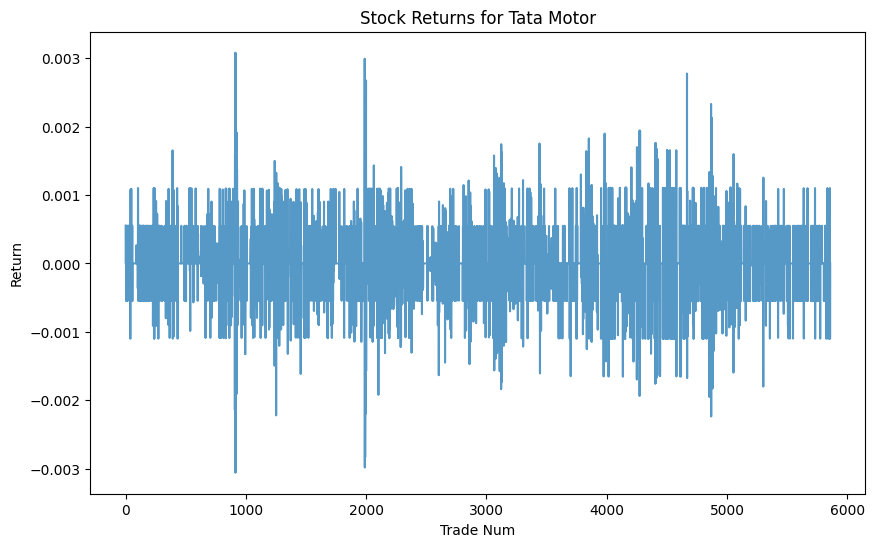

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(ttm_df['Return'], label='Return', alpha=0.75)
plt.title('Stock Returns for Tata Motor')
plt.xlabel('Trade Num')
plt.ylabel('Return')
plt.show()

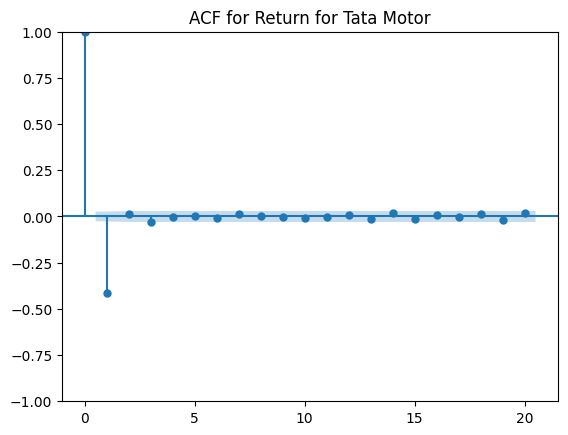

In [51]:
#fit ACF
ttm_df = ttm_df.dropna(subset=['Return'])
plot_acf(ttm_df['Return'], lags=20, alpha=0.05)
plt.title("ACF for Return for Tata Motor")
plt.show()

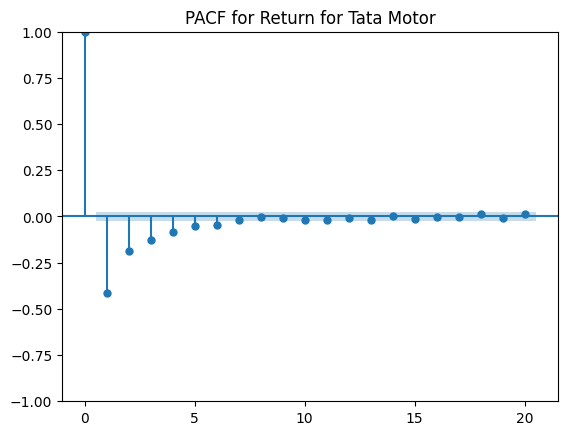

In [52]:
#fit PACF
plot_pacf(ttm_df['Return'], lags=20, alpha=0.05)
plt.title('PACF for Return for Tata Motor')
plt.show()

We see that the PACF decays slowly, while the ACF decays almost instantly after one lag. This suggests an MA(1) model might fit well.

In [53]:
#fit MA(1) model
ma1_model = ARIMA(ttm_df['Return'], order=(0, 0, 1))
ma1_fitted = ma1_model.fit()
print(ma1_fitted.summary())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 5857
Model:                 ARIMA(0, 0, 1)   Log Likelihood               37578.585
Date:                Sat, 25 Jan 2025   AIC                         -75151.171
Time:                        00:35:13   BIC                         -75131.145
Sample:                             0   HQIC                        -75144.208
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.872e-07   2.54e-06     -0.192      0.848   -5.47e-06     4.5e-06
ma.L1         -0.5138      0.009    -60.341      0.000      -0.530      -0.497
sigma2      1.576e-07   1.77e-09     89.168      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


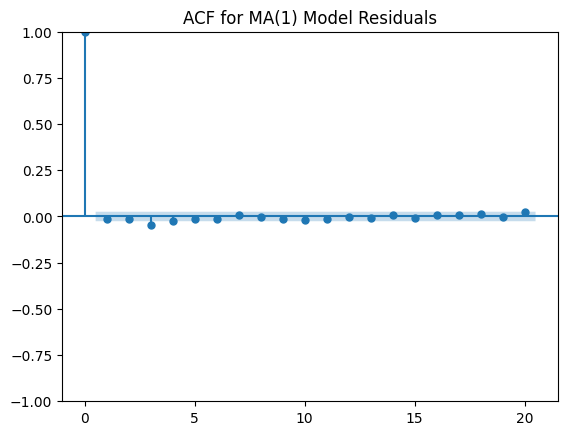

In [54]:
#plot acf for ma1 model to see if remaining autocorrelation
ma1_residuals = ma1_fitted.resid
plot_acf(ma1_residuals, lags=20, alpha=0.05)
plt.title('ACF for MA(1) Model Residuals')
plt.show()


From the ACF for the MA(1) model residuals, it appears as though the MA(1) model does not leave autocorrelation, so it passes residual diagnostics.

In [55]:
#fit MA(2) model
ma2_model = ARIMA(ttm_df['Return'], order=(0, 0, 2))
ma2_fitted = ma2_model.fit()
print(ma2_fitted.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 5857
Model:                 ARIMA(0, 0, 2)   Log Likelihood               37582.493
Date:                Sat, 25 Jan 2025   AIC                         -75156.986
Time:                        00:35:14   BIC                         -75130.285
Sample:                             0   HQIC                        -75147.702
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.451e-07   2.42e-06      0.101      0.919    -4.5e-06    4.99e-06
ma.L1         -0.5284      0.009    -60.066      0.000      -0.546      -0.511
ma.L2         -0.0064      0.009     -0.681      0.4

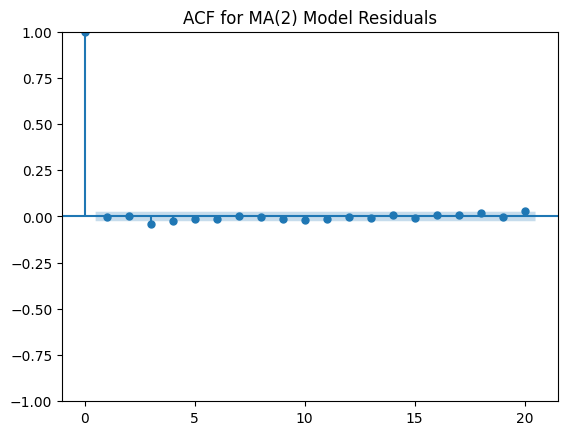

In [56]:
#plot acf for ma2 model to see if remaining autocorrelation
ma2_residuals = ma2_fitted.resid
plot_acf(ma2_residuals, lags=20, alpha=0.05)
plt.title('ACF for MA(2) Model Residuals')
plt.show()


From the ACF for the MA(1) model residuals, it appears as though the MA(1) model does not leave further autocorrelation. Thus, it passes residual diagnositcs.

In [57]:
#fit AR(1), AR(2), and AR(3) models
ar1_model = ARIMA(ttm_df['Return'], order=(1, 0, 0))
ar1_fitted = ar1_model.fit()
ar1_residuals = ar1_fitted.resid

ar2_model = ARIMA(ttm_df['Return'], order=(2, 0, 0))
ar2_fitted = ar2_model.fit()
ar2_residuals = ar2_fitted.resid

ar3_model = ARIMA(ttm_df['Return'], order=(3, 0, 0))
ar3_fitted = ar3_model.fit()
ar3_residuals = ar3_fitted.resid

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/

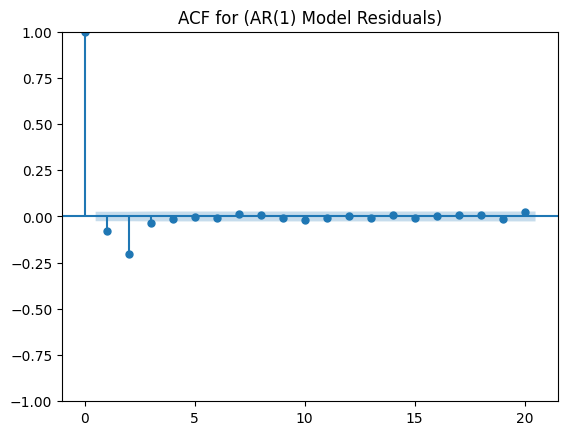

In [58]:
#plot ACF for AR(1) model residuals
plot_acf(ar1_residuals, lags=20, alpha=0.05)
plt.title('ACF for (AR(1) Model Residuals)')
plt.show()

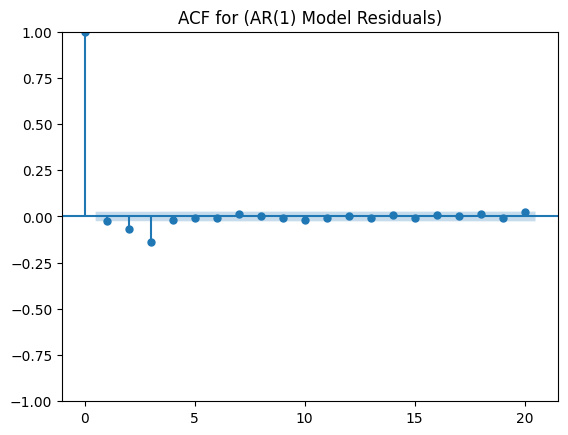

In [59]:
#plot ACF for AR(2) model residuals
plot_acf(ar2_residuals, lags=20, alpha=0.05)
plt.title('ACF for (AR(1) Model Residuals)')
plt.show()


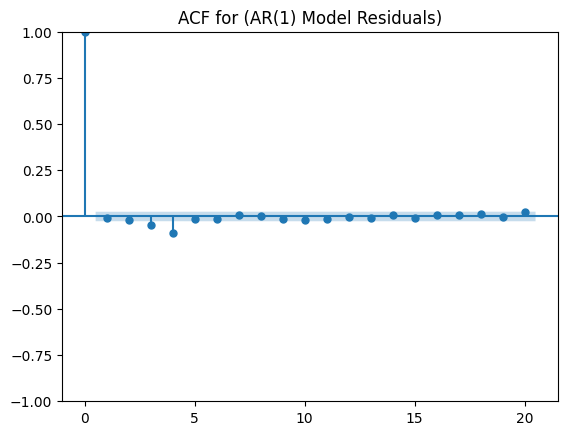

In [60]:
#plot ACF for AR(3) model residuals
plot_acf(ar3_residuals, lags=20, alpha=0.05)
plt.title('ACF for (AR(1) Model Residuals)')
plt.show()

It seems like none of the AR models we examined (AR(1), AR(2), and AR(3)) passed residual diagnostics. There is a statistically significant amount of autocorrelation between the value and certain lag numbers for each of these, according to the ACF. Interestingly, there is not a clear trend except that the autocorrelation seems to decay by around lag 5 for each. However, the decay isn't linear for any of the models, and there is a noticeable spike at around lags 2-3 for each. It is unclear if this is an artifact in the dataset.

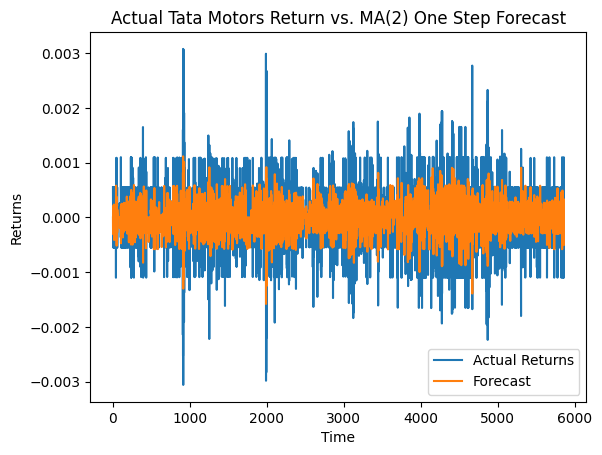

In [61]:
#use ma2 model to build the in sample one step ahead forecasts
start = 0
end = len(ttm_df) - 1
one_step_forecasts = ma2_fitted.predict(start=start, end=end, dynamic=False)

plt.plot(ttm_df.index, ttm_df['Return'], label='Actual Returns')
plt.plot(ttm_df.index, one_step_forecasts, label='Forecast')
plt.title('Actual Tata Motors Return vs. MA(2) One Step Forecast')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

Q7

In [62]:
file_path = "/Users/markoshea/Desktop/Working Directories/Datasets/cpi-acf.csv"
cpi_data = pd.read_csv(file_path)
cpi_data.head()

,observation_date,CPALTT01USM657N
0,1955-02-01,0.0
1,1955-03-01,0.0
2,1955-04-01,0.0
3,1955-05-01,0.0
4,1955-06-01,0.0


In [63]:
#convert date to datetime
cpi_data['observation_date'] = pd.to_datetime(cpi_data['observation_date'])

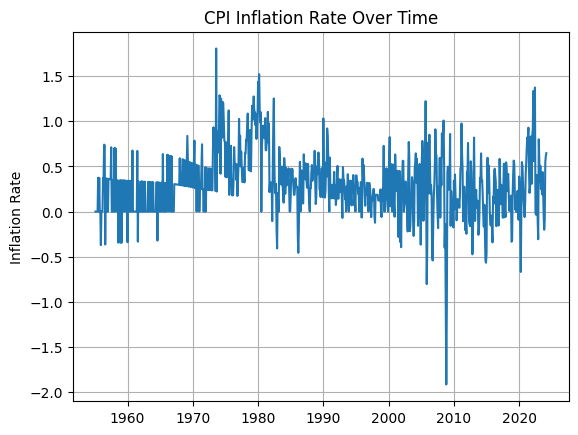

In [64]:
#plot series
plt.plot(cpi_data['observation_date'], cpi_data['CPALTT01USM657N'])
plt.title('CPI Inflation Rate Over Time')
plt.ylabel('Inflation Rate')
plt.grid()
plt.show()

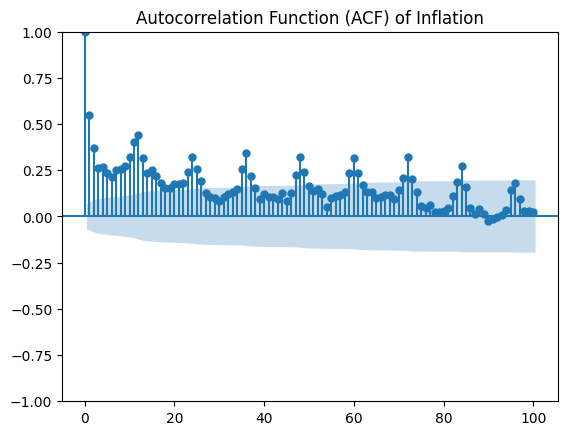

In [65]:
#plot acf
plot_acf(cpi_data['CPALTT01USM657N'], lags=100)  # Adjust `lags` as needed (e.g., 40 lags)
plt.title('Autocorrelation Function (ACF) of Inflation')
plt.show()

There is a significant amount of autocorrelation in the data. It is interesting to note how cyclical the autocorrelation is over such a large timescale. 

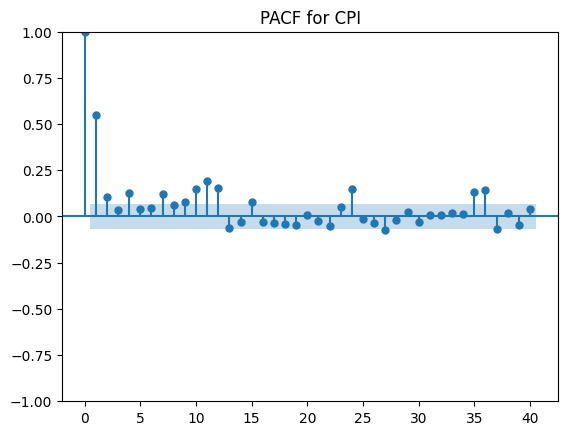

In [66]:
#plot PACF
plot_pacf(cpi_data['CPALTT01USM657N'], lags=40)
plt.title('PACF for CPI')
plt.show()

In [67]:
#fit ARMA()
arma_model = ARIMA(cpi_data['CPALTT01USM657N'], order=(1, 0, 1))
arma_results = arma_model.fit()
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:        CPALTT01USM657N   No. Observations:                  830
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -166.388
Date:                Sat, 25 Jan 2025   AIC                            340.776
Time:                        00:35:18   BIC                            359.662
Sample:                             0   HQIC                           348.019
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2975      0.027     10.981      0.000       0.244       0.351
ar.L1          0.7143      0.032     22.566      0.000       0.652       0.776
ma.L1         -0.2462      0.047     -5.256      0.0

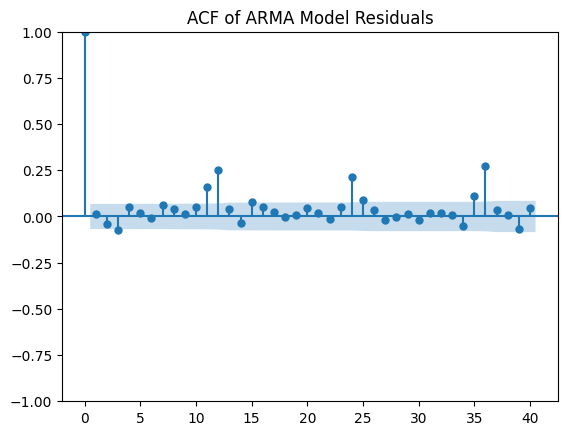

In [68]:
#plot acf for ARMA residuals
arma_residuals = arma_results.resid
plot_acf(arma_residuals, lags=40)
plt.title('ACF of ARMA Model Residuals')
plt.show()

It seems like an ARMA(1,1) seems to fit the data so that it becomes noise quite well, except for the apparent cyclical spike in the data that occurs every 10 or so lags. 

In [69]:
#get AR roots
ar_roots = arma_results.arroots
print("AR Roots:")
print(ar_roots)

AR Roots:
[1.39997845]


We find that the root for the AR(1) process is 1.4 > 1, hence the process is stationary. The fact that this root is relatively close to 1 rather than being very large indicates a stronger dependence and hence a slower decay, so shocks will take longer to die off

In [70]:
#given info at T build 24 month forecast
cpi_forecast = arma_results.get_forecast(steps=24)

forecast_vals = cpi_forecast.predicted_mean

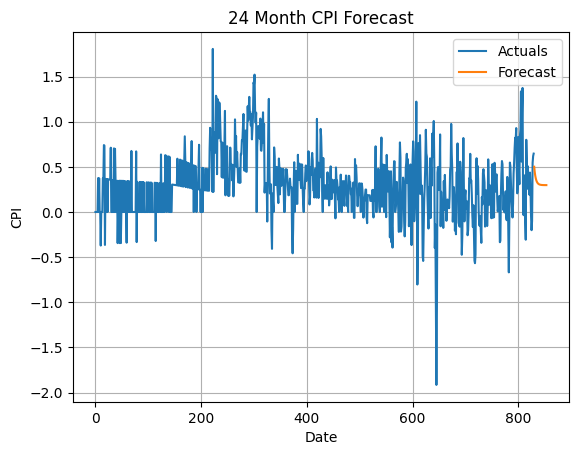

In [144]:
#plot 24 month forecast
plt.plot(cpi_data['CPALTT01USM657N'], label="Actuals")
plt.plot(forecast_vals.index, forecast_vals, label="Forecast")

# Add titles and labels
plt.title("24 Month CPI Forecast")
plt.xlabel("Date")
plt.ylabel("CPI")

plt.legend()
plt.grid()
plt.show()